# Output
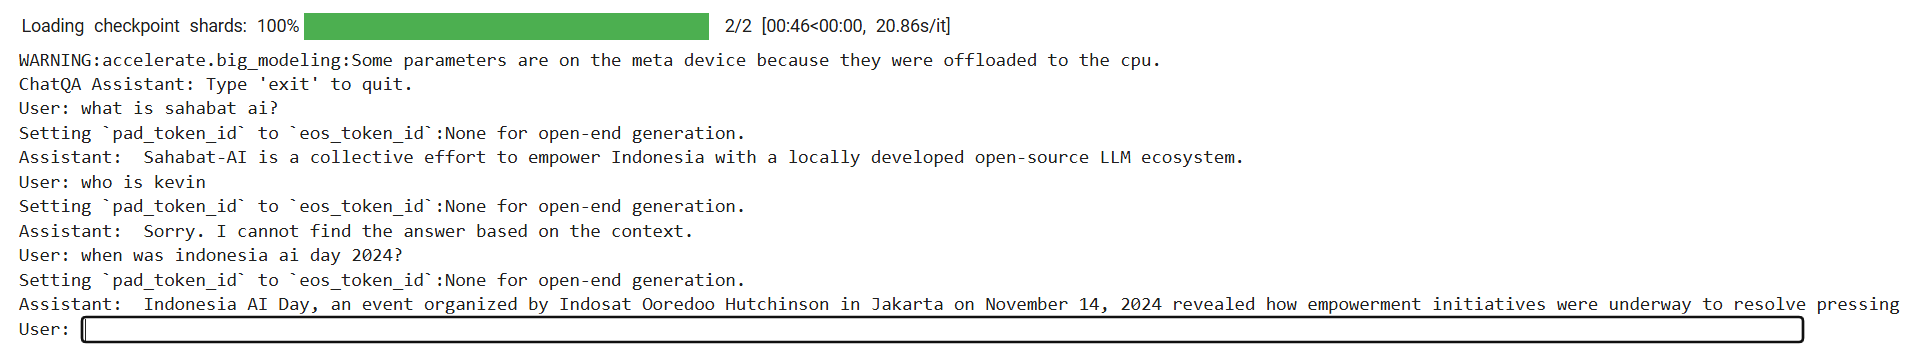

Importing Necessary Libraies


In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

Load the model and tokenizer

It will take a long time to load, especially during the last line. Go walk and talk with your friends 🍵.

In [ ]:
# Load the model and tokenizer
model_id = "nvidia/Llama3-ChatQA-1.5-8B"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(model_id, torch_dtype=torch.float16, device_map="auto")

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Open the 'document.txt' that will be read by the LLM model.

In [ ]:
# Read the document from a text file
with open("document.txt", "r") as file:
    document = file.read()

print(document)

Indonesia AI Day, an event organized by Indosat Ooredoo Hutchinson in Jakarta on November 14, 2024 revealed how empowerment initiatives were underway to resolve pressing human challenges and gave assurance as to how AI development bode well for Indonesia’s economy in the future. This groundbreaking project, launched during the AI Day event, is a significant step forward in advancing Indonesia’s digital sovereignty, preserving its linguistic heritage and unlocking new pathways for socio-economic growth and innovation. Sahabat-AI is a collective effort to empower Indonesia with a locally developed open-source LLM ecosystem. Created by Indonesians, for Indonesians, it aligns with the Golden Indonesia 2045 vision, supporting national leadership in technology and infrastructure. Due to its understanding of local context, Sahabat-AI will enable Indonesians to build AI-based services and applications in Bahasa Indonesia and various local languages, addressing a gap left by other global AI mod

In [ ]:
# Initialize conversation messages
messages = []

# Function to format the input
def get_formatted_input(messages, context):
    system = "System: This is a chat between a user and an artificial intelligence assistant. The assistant gives helpful, detailed, and polite answers to the user's questions based on the context. The assistant should also indicate when the answer cannot be found in the context."
    instruction = "Please give a full and complete answer for the question."

    for item in messages:
        if item['role'] == "user":
            # Only apply this instruction for the first user turn
            item['content'] = instruction + " " + item['content']
            break

    conversation = '\n\n'.join(["User: " + item["content"] if item["role"] == "user" else "Assistant: " + item["content"] for item in messages]) + "\n\nAssistant:"
    formatted_input = system + "\n\n" + context + "\n\n" + conversation

    return formatted_input

Function to generate a response



In [ ]:
# Function to generate a response
def generate_response(messages, context):
    formatted_input = get_formatted_input(messages, context)
    tokenized_prompt = tokenizer(tokenizer.bos_token + formatted_input, return_tensors="pt").to(model.device)

    terminators = [
        tokenizer.eos_token_id,
        tokenizer.convert_tokens_to_ids("<|eot_id|>")
    ]

    outputs = model.generate(input_ids=tokenized_prompt.input_ids, attention_mask=tokenized_prompt.attention_mask, max_new_tokens=128, eos_token_id=terminators)
    response = outputs[0][tokenized_prompt.input_ids.shape[-1]:]
    return tokenizer.decode(response, skip_special_tokens=True)

Run the Question-Answering Loop

If you can't run it in VSCode/Colab/Jupyter Notebook due to insufficient computational resources, it's fine and it won't affect your score.

In [ ]:
# Back-to-back QA loop
print("ChatQA Assistant: Type 'exit' to quit.")
while True:
    user_input = input("User: ")
    if user_input.lower() == "exit":
        print("Exiting ChatQA. Goodbye!")
        break

    # Append user input to messages
    messages.append({"role": "user", "content": user_input})

    # Generate assistant response
    assistant_response = generate_response(messages, document)

    # Append assistant response to messages
    messages.append({"role": "assistant", "content": assistant_response})

    # Display assistant's response
    print(f"Assistant: {assistant_response}")

ChatQA Assistant: Type 'exit' to quit.
User: hi kevin


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


KeyboardInterrupt: 